In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

df = yf.download("MSFT", start="2020-01-01", end=pd.to_datetime('today').strftime('%Y-%m-%d'))
df = df[['Close']].copy()
df.tail()

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df)

C:\Users\anany\AppData\Local\Temp\ipykernel_8792\524436799.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download("MSFT", start="2020-01-01", end=pd.to_datetime('today').strftime('%Y-%m-%d'))
[*********************100%***********************]  1 of 1 completed


In [2]:
def create_dataset(data, time_step=60):
    X, y = [], []
    for i in range(len(data) - time_step): #into sequences of required lookback periods
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

X, y = create_dataset(scaled_data, 60) #lookback period of 60 days

X = X.reshape(X.shape[0], X.shape[1], 1)
y = y.reshape(y.shape[0], 1)

train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

model = Sequential()
model.add(SimpleRNN(50, return_sequences=False, input_shape=(60, 1)))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)




Epoch 1/50

28/28 [==============================] - 4s 37ms/step - loss: 0.0091 - val_loss: 0.0079
Epoch 2/50
28/28 [==============================] - 1s 19ms/step - loss: 5.2018e-04 - val_loss: 0.0062
Epoch 3/50
28/28 [==============================] - 1s 19ms/step - loss: 3.3958e-04 - val_loss: 0.0034
Epoch 4/50
28/28 [==============================] - 1s 28ms/step - loss: 3.3939e-04 - val_loss: 0.0042
Epoch 5/50
28/28 [==============================] - 1s 21ms/step - loss: 2.9645e-04 - val_loss: 0.0038
Epoch 6/50
28/28 [==============================] - 1s 18ms/step - loss: 2.8600e-04 - val_loss: 0.0030
Epoch 7/50
28/28 [==============================] - 1s 19ms/step - loss: 2.7251e-04 - val_loss: 0.0028
Epoch 8/50
28/28 [==============================] - 1s 19ms/step - loss: 2.7129e-04 - val_loss: 0.0021
Epoch 9/50
28/28 [==============================] - 1s 24ms/step - loss: 2.7002e-04 - val_loss: 0.0023
Epoch 10/50
28/28 [==============================] - 1s 24ms/step - loss:

In [4]:
import matplotlib.pyplot as plt

predictions = model.predict(X_test)
predicted_prices = scaler.inverse_transform(predictions)
actual_prices = scaler.inverse_transform(y_test)

9/9 [==============================] - 0s 2ms/step


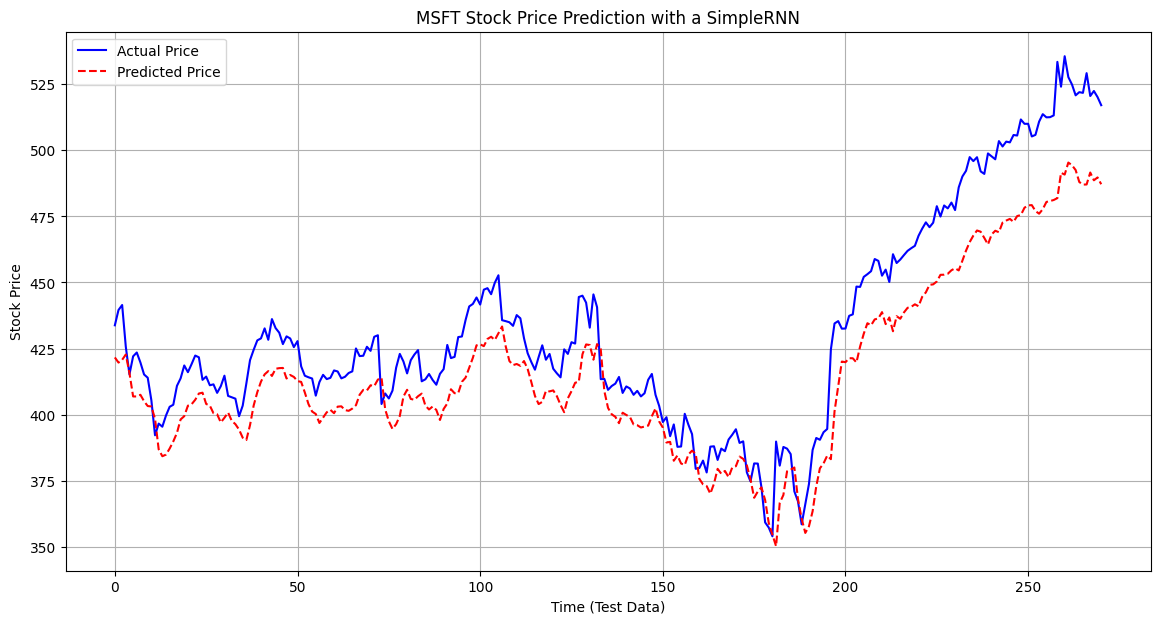

In [5]:
plt.figure(figsize=(14, 7))
plt.plot(actual_prices, label='Actual Price', color='blue')
plt.plot(predicted_prices, label='Predicted Price', color='red', linestyle='--')
plt.title('MSFT Stock Price Prediction with a SimpleRNN')
plt.xlabel('Time (Test Data)')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
#considers each 60 day period sequentially day wise
#maintains logical chronology while carrying insights forward
#cannot work directly on sequential data without a lookback period
#vanishing gradients suppress factors over a period of many days (hence the lookback)
#struggles to learn from far back data due to back propagated gradients on same weights